<a href="https://www.kaggle.com/code/kaustavsingharoy/netflix-eda-pre-processing-visualization-insights?scriptVersionId=130527362" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Table of Contents

* [Introduction](#section-one)
* [Input Data and Libraries](#section-two)
* [Data Pre-processing](#section-three)
* [What Type of Content is Created More on Netflix](#section-four)
* [Which Are The Top Ratings of Netflix Content](#section-five)
* [Which Are The Top Content Producing Countries](#section-six)
* [Is Netflix Producing More Content with Time](#section-seven)
* [What is the Prefered Duration of Movies and TV Series](#section-eight)


    


<a id="section-one"></a>
# Introduction

<a id="section-two"></a>
# Input Data and Libraries

We will use numpy and pandas for data processing and analysis and matplotlib and seaborn for the charts.

Reference to the Netflix data is provided at the end



In [1]:
# Loading the required liabries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Import the netflix dataset.
df=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<a id="section-three"></a>
# Data Cleanup & Pre-processing

We will start with listing all the features in the data set and checking how many  null values they have


In [2]:
# Name of all the features
for i in df.columns:
    print(i)

show_id
type
title
director
cast
country
date_added
release_year
rating
duration
listed_in
description


In [3]:

# Find All the null values in the dataset.
for i in range(len(df.isnull().sum())):
    if df.isnull().sum()[i] > 0:
        print('Number of missing values in ' + df.isnull().sum().index[i] + ' : ',df.isnull().sum()[i])

Number of missing values in director :  2634
Number of missing values in cast :  825
Number of missing values in country :  831
Number of missing values in date_added :  10
Number of missing values in rating :  4
Number of missing values in duration :  3


Most of the nulls appear in Director, Cast and Country. Difficult to see a correlation of any feature with director and cast. So we will focus on the rest.

**Country**

This is the feature that shows where was the content produced.

There should be some correlation with cast and director and we can safely populate values where 100% correlation is observed.

For eg. if A.R. Murugadoss only makes movies in India and one of his content is missing 'country', then India is a safe assumption.


**Duration**



If we observe the columns of rating & duration, we can see that there is a value mismatch present.

Hence, we will switch the values of the above index values from rating column to duration column.



In [4]:
df[df.isnull()['duration'] == True]

index = list(df[df.isnull()['duration'] == True].index)
df.loc[index, 'duration'] = df.loc[index, 'rating']
df.loc[index,'rating'] = np.nan
df.loc[index,:]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [5]:


# To avoid settingWithCopyWarning.
pd.options.mode.chained_assignment=None

# Fill all null values in the datatset with 'Unavailable'.
df.fillna({'cast':'Unavailable'},inplace=True)
df.fillna({'country':'Unavailable'},inplace=True)
df.fillna({'rating':'Unavailable'},inplace=True)

<a id="section-four"></a>
# What Type of Content is Created More on Netflix

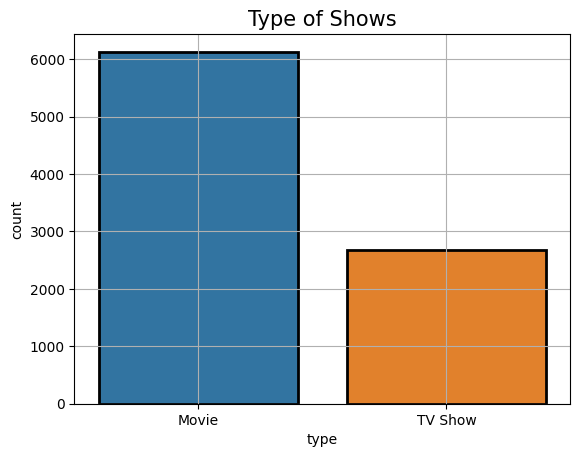

In [6]:
# Countplot on the show type column of the dataset.
sns.countplot(x='type',data=df,ec='black',lw=2)
plt.title('Type of Shows',fontsize=15)
plt.grid(True)
plt.show()

<a id="section-five"></a>
# Which Are the Top Ratings of Netflix Content

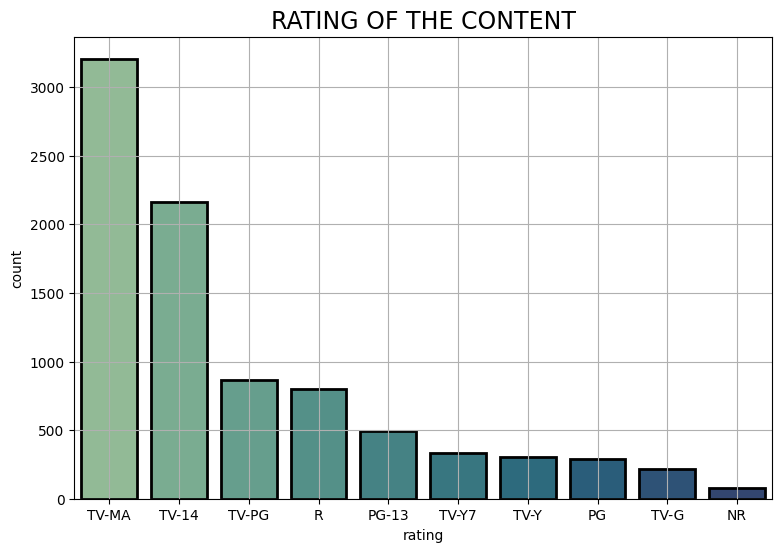

In [7]:
# Plot of the top 10 rating of the content on the Netflix.
plt.figure(figsize=(9,6))
sns.countplot(x='rating',order=df['rating'].value_counts().index[0:10],data=df,ec='black',lw=2,palette="crest")
plt.title('RATING OF THE CONTENT',fontsize=17)
plt.grid(True)
plt.show()

So most content in Netflix seems to be in the Matured category which would have some amount of violence, offensive and explicit content.

Perhaps it will be better to look at this feature specific to countries like India and United States.



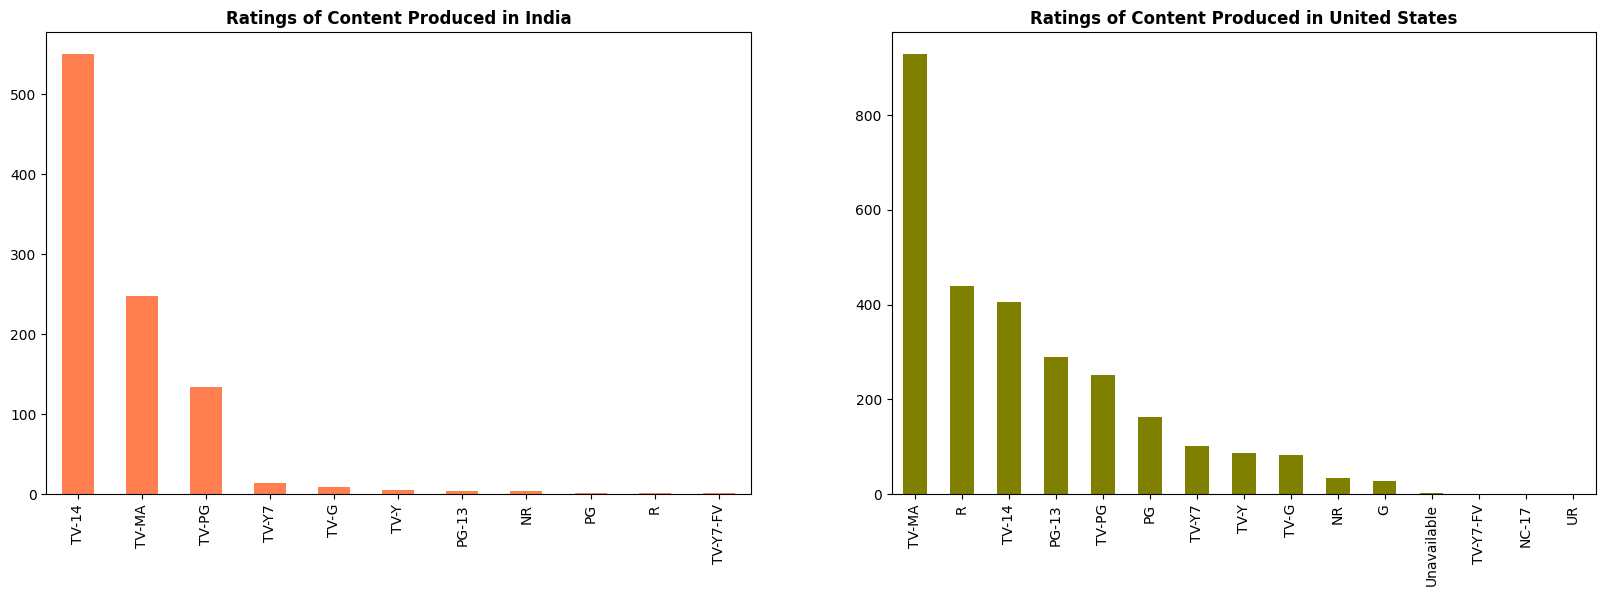

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1 )
df[df["country"]=="India"]['rating'].value_counts().sort_values(ascending=False)[:20].plot(kind="bar",color="coral")
plt.title("Ratings of Content Produced in India",fontweight="bold", size=12)

plt.subplot(1,2,2 )
df[df["country"]=="United States"]['rating'].value_counts().sort_values(ascending=False)[:20].plot(kind="bar",color="Olive")
plt.title("Ratings of Content Produced in United States" ,fontweight="bold", size=12)
plt.show()

India seems to be producing most content in the TV-14 category which is quite different from other top producing countries like US where TV-MA and R are the top categories which cater to more violent, offensive or sexual content.

<a id="section-six"></a>
# Which Are The Top Content Producting Countries on Netflix

Text(0.5, 1.0, 'Top 10 Content Producing Countries')

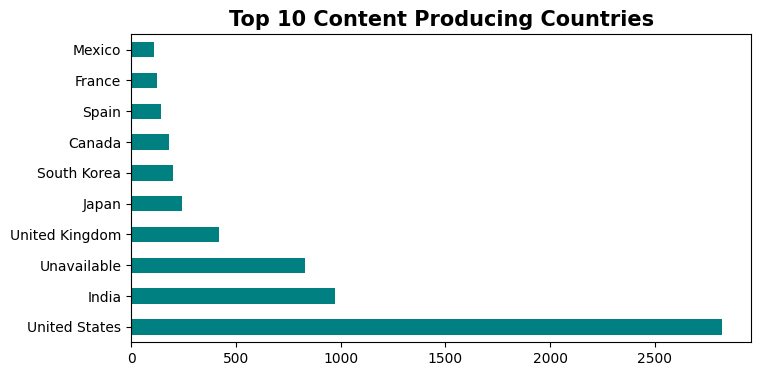

In [9]:
plt.figure(figsize=(8,4))
df['country'].value_counts().sort_values(ascending=False)[:10].plot(kind="barh",color="Teal")
plt.title('Top 10 Content Producing Countries',fontweight="bold", size=15)

United States is predictably the largest content producer followed by India. 

United Kingdom, Japan and Korea are the other top 5 producers of content.

<a id="section-seven"></a>
# Is Netflix Producing More Content With Time And Which Year Produced Most Current Content on Netflix 

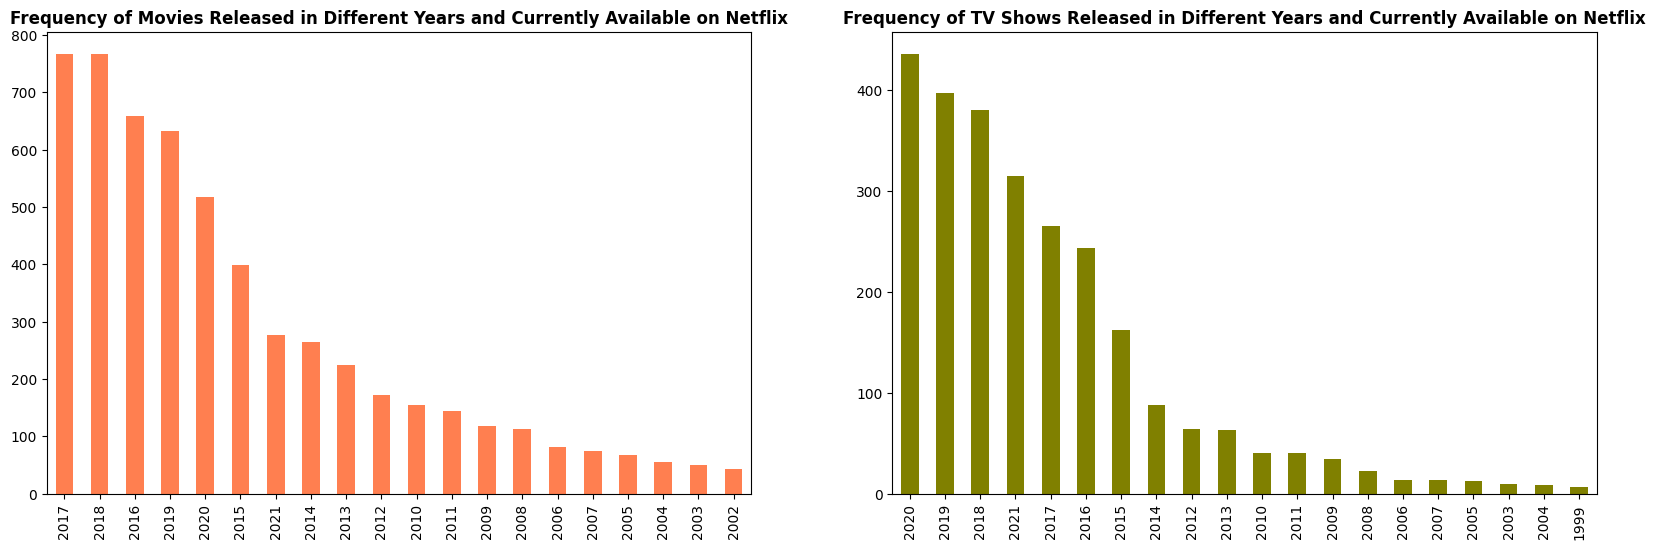

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1 )
df[df["type"]=="Movie"]['release_year'].value_counts().sort_values(ascending=False)[:20].plot(kind="bar",color="coral")
plt.title("Frequency of Movies Released in Different Years and Currently Available on Netflix",fontweight="bold", size=12)

plt.subplot(1,2,2 )
df[df["type"]=="TV Show"]['release_year'].value_counts().sort_values(ascending=False)[:20].plot(kind="bar",color="Olive")
plt.title("Frequency of TV Shows Released in Different Years and Currently Available on Netflix" ,fontweight="bold", size=12)
plt.show()

As it can be seen, there is a steady jump of content from 2014 onwards in both movies and TV series. Movies are produced more than TV series from then onwards.

The dip in both categries from 2019-20 onwards can be attributed to Covid due to which it looks like less content were produced evereywhere.

<a id="section-ei"></a>
# What is the Preferred Duration of Movies and TV Series


In [11]:
durationdf = []
for i in tqdm(df['duration']):
    if 'min' in i:
        num = int(int(i.split(' ')[0]) / 10)
        durationdf.append( str(num) + ' - ' + str(num + 1))
    else:
        durationdf.append(int(int(i.split(' ')[0])))
df.insert(loc = 8, column = 'Duration Group', value = durationdf)
df.head()

100%|██████████| 8807/8807 [00:00<00:00, 381186.26it/s]


,show_id,type,title,director,cast,country,date_added,release_year,Duration Group,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unavailable,United States,"September 25, 2021",2020,9 - 10,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unavailable,"September 24, 2021",2021,1,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,Unavailable,Unavailable,"September 24, 2021",2021,1,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,2,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


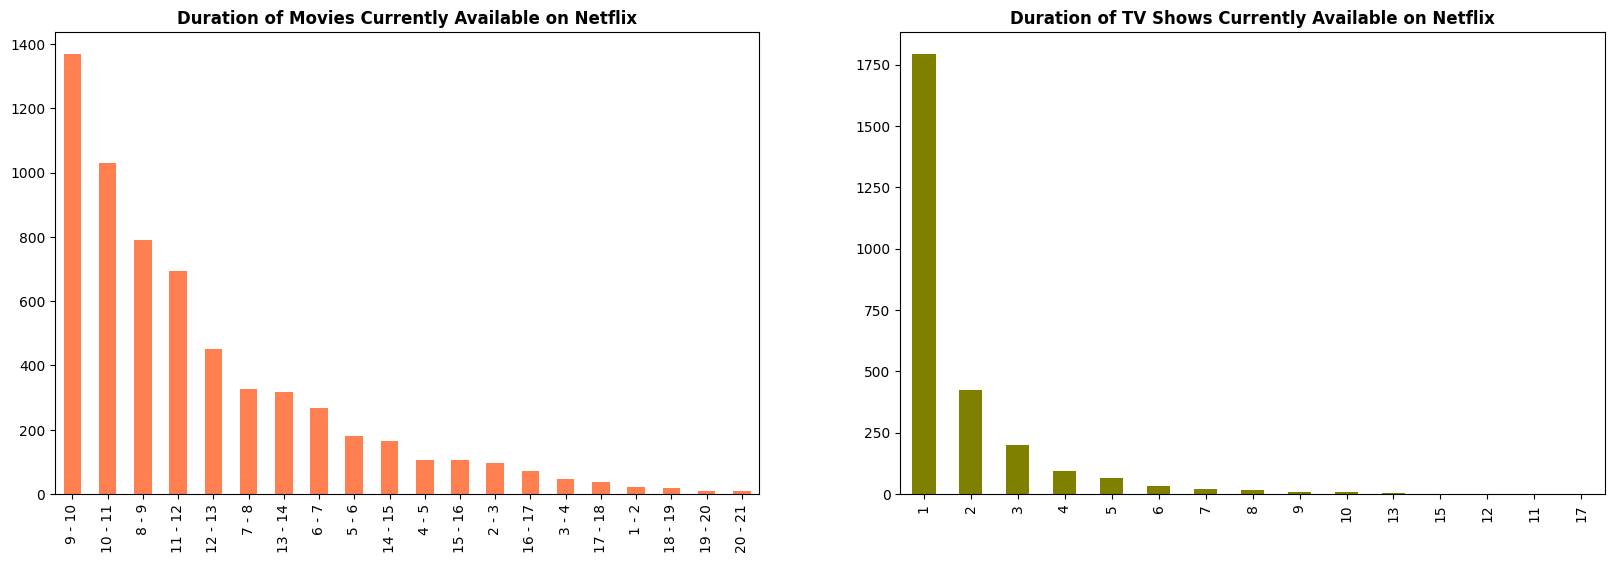

In [12]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1 )
df[df["type"]=="Movie"]['Duration Group'].value_counts().sort_values(ascending=False)[:20].plot(kind="bar",color="coral")
plt.title("Duration of Movies Currently Available on Netflix",fontweight="bold", size=12)

plt.subplot(1,2,2 )
df[df["type"]=="TV Show"]['Duration Group'].value_counts().sort_values(ascending=False)[:20].plot(kind="bar",color="Olive")
plt.title("Duration of TV Shows Currently Available on Netflix" ,fontweight="bold", size=12)
plt.show()



Most movies are in the 80-110 minutes duration. There are very few short films. 

On the other side, there are some movies with close to 4 hours duration as well.

Overwhelming majority of TV series are of 1 season.